In [1]:
import numpy as np
from matplotlib import pyplot as plt
import constraint as con
from tabulate import tabulate
from matplotlib import ticker

# Comparações entre métodos de otimização restrita

## Problema-Exemplo

Seja o seguinte problema de otimização restrito:

\begin{align}
    \mathbf{x^*} = \mathrm{arg}\min_{\mathbf{x}} f(\mathbf{x})=~&(x_1-2)^4 + (x_1-2x_2)^2 \\
    \mathrm{sujeito~a~} h(\mathbf{x}):~& x_1^2 - x_2 = 0
\end{align}

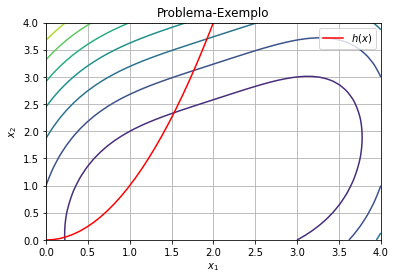

In [2]:
# Malha de pontos para gráfico de contorno
x1, x2 = np.meshgrid(np.linspace(0, 4),
                     np.linspace(0, 4))

# Função objetivo
f = (x1-2)**4 + (x1-2*x2)**2

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição h(x)
hx1 = np.linspace(0, 4)
hx2 = hx1**2
plt.plot(hx1, hx2, 'r', label=r'$h(x)$')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()

plt.show()

## Comparações

Método    x*                         Iter.            u        Folga
--------  -----------------------  -------  -----------  -----------
Exterior  [0.94549198 0.89395502]       43   2.4879e+07  7.04519e-08
ALM       [0.94558239 0.89412605]       12  86.4976      7.88138e-09


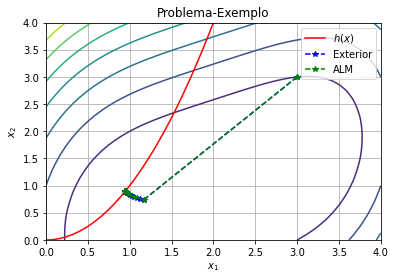

In [3]:
def f(x):
    x1, x2 = x[0], x[1]
    return (x1-2)**4 + (x1-2*x2)**2

def h(x):
    x1, x2 = x[0], x[1]
    return x1**2 - x2

x0 = [3, 3]
precision = 1e-8

exterior = con.expenalty(f, x0, h=h, precision=precision)
alm = con.alm(f, x0, h=h, precision=precision)

table = [['Exterior', exterior.x, exterior.niter, exterior.u, exterior.slack],
         ['ALM', alm.x, alm.niter, alm.u, alm.slack]]

print(tabulate(table, headers=['Método', 'x*', 'Iter.', 'u', 'Folga']))

# Função objetivo
f = (x1-2)**4 + (x1-2*x2)**2

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição h(x)
hx1 = np.linspace(0, 4)
hx2 = hx1**2
plt.plot(hx1, hx2, 'r', label=r'$h(x)$')
plt.xlim([0, 4])
plt.ylim([0, 4])

# Exibe a trajetória do algoritmo 1
plt.plot(exterior.path[:, 0], exterior.path[:, 1], '*--', color='b',
         label='Exterior')

# Exibe a trajetória do algoritmo 2
plt.plot(alm.path[:, 0], alm.path[:, 1], '*--', color='g', label='ALM')

plt.legend()

plt.show()

## Problema-Exemplo

Seja o seguinte problema de otimização restrito:

\begin{align}
    \mathbf{x^*} = \mathrm{arg}\min_{\mathbf{x}} f(\mathbf{x})=~& \left[1 + (x+y+1)^2(19-14x+3x^2-14y+6*xy+3y^2)\right] \nonumber \\
    & \times\left[ 30 + (2x-3y)^2(18-32x+12x^2+48y-36xy+27y^2) \right] \\
    \mathrm{sujeito~a~} h(\mathbf{x}):~& (x+0.7)^2 + (y+1)^2 - 0.5^2 \le 0
\end{align}

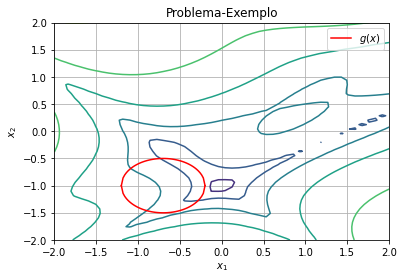

In [4]:
# Malha de pontos para gráfico de contorno
x, y = np.meshgrid(np.linspace(-2, 2),
                   np.linspace(-2, 2))

# Função objetivo
f = ((1 + (x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))
     * (30 + (2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2)))

# Adiciona o contorno na figura
plt.contour(x, y, f, locator=ticker.LogLocator())
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição g(x)
gx = np.linspace(-.7-.5, -.7+.5)
gy = -1 - np.sqrt(.5**2 - (gx+.7)**2)
plt.plot(gx, gy, 'r', label=r'$g(x)$')
gy = -1 + np.sqrt(.5**2 - (gx+.7)**2)
plt.plot(gx, gy, 'r')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.legend()

plt.show()

## Comparando o ALM com Penalização Interna (Barreiras)

Método    x*                           Iter.      u         Folga
--------  -------------------------  -------  -----  ------------
Interior  [-0.7 -1. ]                      2  1e+23  -0.25
ALM       [-0.20813334 -1.08981767]       11  1e+10   2.08814e-08


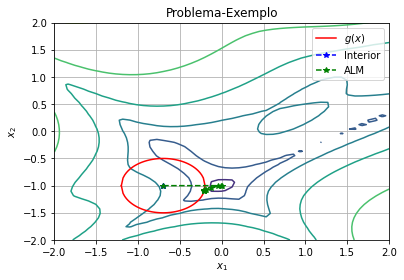

In [5]:
def f(vars):
    x, y = vars[0], vars[1]
    return ((1 + (x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))
            * (30 + (2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2)))

def g(vars):
    x, y = vars[0], vars[1]
    return (x+.7)**2 + (y+1.)**2 - 0.5**2

x0 = [-.7, -1.]
precision = 1e-4

interior = con.inpenalty(f, x0, g=g, u0=1e25, alpha=1e2, precision=precision)
alm = con.alm(f, x0, g=g, alpha=10, precision=precision)

table = [['Interior', interior.x, interior.niter, interior.u, interior.slack],
         ['ALM', alm.x, alm.niter, alm.u, alm.slack]]

print(tabulate(table, headers=['Método', 'x*', 'Iter.', 'u', 'Folga']))

# Função objetivo
f = ((1 + (x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))
     * (30 + (2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2)))

# Adiciona o contorno na figura
plt.contour(x, y, f, locator=ticker.LogLocator())
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição g(x)
gx = np.linspace(-.7-.5, -.7+.5)
gy = -1 - np.sqrt(.5**2 - (gx+.7)**2)
plt.plot(gx, gy, 'r', label=r'$g(x)$')
gy = -1 + np.sqrt(.5**2 - (gx+.7)**2)
plt.plot(gx, gy, 'r')
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Exibe a trajetória do algoritmo 1
plt.plot(interior.path[:, 0], interior.path[:, 1], '*--', color='b',
         label='Interior')

# Exibe a trajetória do algoritmo 2
plt.plot(alm.path[:, 0], alm.path[:, 1], '*--', color='g', label='ALM')

plt.legend()

plt.show()

## Último teste

\begin{align}
    \mathbf{x^*} = \mathrm{arg}\min_{\mathbf{x}} f(\mathbf{x})=~&(x_1-2)^4 + (x_1-2x_2)^2 \\
    \mathrm{sujeito~a~} & \begin{cases} h_1(\mathbf{x}):~& x_1^2 - x_2 = 0 \\ h_2(\mathbf{x}):~& (x_1-2)^2 + (x_2-2)^2 - 1 = 0 \\ g_1(\mathbf{x}):~& x_1^2 + x_2 - 4 \le 0 \end{cases}
\end{align}

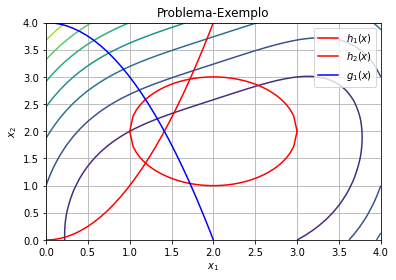

In [6]:
# Malha de pontos para gráfico de contorno
x1, x2 = np.meshgrid(np.linspace(0, 4),
                     np.linspace(0, 4))

# Função objetivo
f = (x1-2)**4 + (x1-2*x2)**2

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição h1(x)
h1x1 = np.linspace(0, 4)
h1x2 = h1x1**2
plt.plot(h1x1, h1x2, 'r', label=r'$h_1(x)$')

# Calcula e exibe curva de restrição h2(x)
h2x1 = np.linspace(1, 3)
h2x2 = np.sqrt(1 - (h2x1 - 2)**2) + 2
plt.plot(h2x1, h2x2, 'r', label=r'$h_2(x)$')
h2x2 = -np.sqrt(1 - (h2x1 - 2)**2) + 2
plt.plot(h2x1, h2x2, 'r')

# Calcula e exibe curva de restrição g1(x)
g1x2 = 4 - h1x1**2
plt.plot(h1x1, g1x2, 'b', label=r'$g_1(x)$')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()

plt.show()

## Comparando os métodos

Método    x*                         Iter.  u                                                        Folga
--------  -----------------------  -------  -------------------------------------------------------  -------------------------------------------------
Exterior  [1.18932756 1.4145    ]       44  [37318496.58317254 37318496.58317254 37318496.58317254]  [-1.17099996e+00  4.16873742e-08  5.45296921e-08]
ALM       [1.18932756 1.41450002]       12  [86.49755859 86.49755859 86.49755859]                    [-1.17099994e+00  2.01675352e-08  3.05406531e-08]


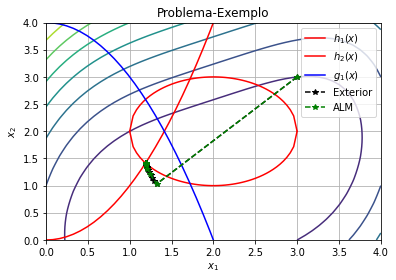

In [7]:
def f(x):
    x1, x2 = x[0], x[1]
    return (x1-2)**4 + (x1-2*x2)**2

def h1(x):
    x1, x2 = x[0], x[1]
    return x1**2 - x2

def h2(x):
    x1, x2 = x[0], x[1]
    return (x1-2)**2 + (x2-2)**2 - 1

def g1(x):
    x1, x2 = x[0], x[1]
    return x1**2 + x2 - 4

x0 = [3, 3]
precision = 1e-8

exterior = con.expenalty(f, x0, g=g1, h=[h1, h2], precision=precision)
alm = con.alm(f, x0, g=g1, h=[h1, h2], precision=precision)

table = [['Exterior', exterior.x, exterior.niter, exterior.u, exterior.slack],
         ['ALM', alm.x, alm.niter, alm.u, alm.slack]]

print(tabulate(table, headers=['Método', 'x*', 'Iter.', 'u', 'Folga']))

# Função objetivo
f = (x1-2)**4 + (x1-2*x2)**2

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição h1(x)
h1x1 = np.linspace(0, 4)
h1x2 = h1x1**2
plt.plot(h1x1, h1x2, 'r', label=r'$h_1(x)$')

# Calcula e exibe curva de restrição h2(x)
h2x1 = np.linspace(1, 3)
h2x2 = np.sqrt(1 - (h2x1 - 2)**2) + 2
plt.plot(h2x1, h2x2, 'r', label=r'$h_2(x)$')
h2x2 = -np.sqrt(1 - (h2x1 - 2)**2) + 2
plt.plot(h2x1, h2x2, 'r')

# Calcula e exibe curva de restrição g1(x)
g1x2 = 4 - h1x1**2
plt.plot(h1x1, g1x2, 'b', label=r'$g_1(x)$')
plt.xlim([0, 4])
plt.ylim([0, 4])

# Exibe a trajetória do algoritmo 1
plt.plot(exterior.path[:, 0], exterior.path[:, 1], '*--', color='k',
         label='Exterior')

# Exibe a trajetória do algoritmo 2
plt.plot(alm.path[:, 0], alm.path[:, 1], '*--', color='g', label='ALM')

plt.legend()

plt.show()